# Storm-Tracker 探空資料基本分析

我們初步嘗試了以 P, T_st, RH_st 來校正溫度與濕度，發現效果並不是很好，因此我們有必要對探空資料的基本特性進行一些探索，以期能找出其他有助於校正的變數。

In [1]:
import numpy as np
import pandas as pd
import os, sys, csv

# 讀取整理好的資料
data = pd.read_csv('../data/stqc_iodata.csv')
print(data.head())
print(data.shape)

                key         time       P       T_st      RH_st      U_st  \
0  20180625_06_1000  20180625_06  1000.0  33.504632  62.417895 -1.217775   
1   20180625_06_999  20180625_06   999.0  33.362504  62.662493  2.042479   
2   20180625_06_998  20180625_06   998.0  33.183320  63.166699  5.502851   
3   20180625_06_997  20180625_06   997.0  33.025238  63.756463  1.987596   
4   20180625_06_996  20180625_06   996.0  32.892530  64.291565  6.566753   

       V_st        dT       dRH  
0 -1.217775 -2.004632  0.502106  
1  2.042479 -1.962504  0.437507  
2  5.502851 -1.863320  0.013301  
3  1.987596 -1.825238 -0.256463  
4  6.566753 -1.792530 -0.566564  
(261231, 9)


In [4]:
# 以時間戳記區分探空
timestamps = list(data['time'].unique())
print('總共有 ' + str(len(timestamps)) + ' 筆探空')

總共有 411 筆探空


(701, 9)


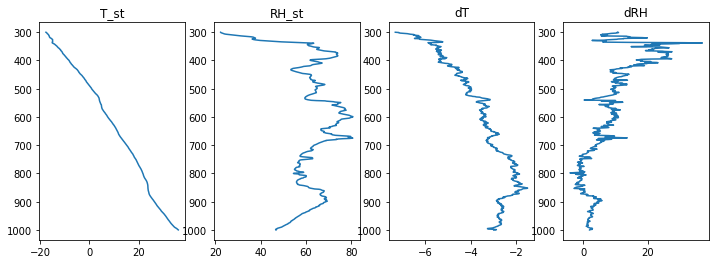

()

In [25]:
# 繪製垂直剖面
def plot_st_profile(data):
    # Loading library
    %matplotlib inline
    import matplotlib.pyplot as plt
    # Define subplots
    fig, axs = plt.subplots(1, 4, figsize=(12,4))
    axs[0].plot(data['T_st'], data['P'], label='T')
    axs[0].invert_yaxis()
    axs[0].set_title('T_st')
    axs[1].plot(data['RH_st'], data['P'], label='RH')
    axs[1].invert_yaxis()
    axs[1].set_title('RH_st')
    axs[2].plot(data['dT'], data['P'], label='dT')
    axs[2].invert_yaxis()
    axs[2].set_title('dT')
    axs[3].plot(data['dRH'], data['P'], label='dRH')
    axs[3].invert_yaxis()
    axs[3].set_title('dRH')
    plt.show()
    return()

# 測試繪圖函數
d = data.loc[data['time']==timestamps[100],:]
print(d.shape)
plot_st_profile(d)

In [26]:
data.corr()

,P,T_st,RH_st,U_st,V_st,dT,dRH
P,1.000000,0.893693,0.611747,-0.468562,-0.468562,0.506893,-0.314410
T_st,0.893693,1.000000,0.533595,-0.563013,-0.563013,0.257329,-0.145988
RH_st,0.611747,0.533595,1.000000,-0.371415,-0.371415,0.335407,-0.092745
U_st,-0.468562,-0.563013,-0.371415,1.000000,1.000000,0.101461,-0.124897
V_st,-0.468562,-0.563013,-0.371415,1.000000,1.000000,0.101461,-0.124897
dT,0.506893,0.257329,0.335407,0.101461,0.101461,1.000000,-0.653357
dRH,-0.314410,-0.145988,-0.092745,-0.124897,-0.124897,-0.653357,1.000000


從上面的相關係數矩陣裡，我們可以看到，溫度與氣壓、濕度的相關係數都相當高（0.89, 0.61），這也是上一篇筆記中做線性回歸會出現「共線性」的主要原因。而與氣溫校正值（dT）相關最高的是「濕度校正值」和「氣壓」；與濕度校正值（dRH）相關最高的是「氣溫校正值」。

